# CS 316 : Introduction to Deep Learning
## Lab 07 :  Optimization
### Dr. Abdul Samad

# Instructions


1. Please rename your notebook as *Lab_7_aa1234.ipynb* before the final submission. Notebooks which do not follow appropriate naming convention will not be graded.

2. Filling out the feedback form on Canvas is mandatory. Failure to do so will result in you losing 10% of your grade for this lab.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Please submit your own work. If you have any questions, please feel free to reach out to the course instructor or RA.

# Overview

In this lab, we will be covering Gradient Descent along with its variants ( Mini-Batch Gradient, Stochastic Gradient, Batch Gradient Descent and Momentum). In addition to, we will also discuss advanced optimizers like ADAGRAD, ADADELTA, and ADAM. We will discuss these optimizers by comparing their performances when doing Linear Regression on the Boston Housing Dataset(**Covered in Lab04**).

# Setup

In [ ]:
# DO NOT EDIT
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import urllib.request
import pandas as pd


# Boston Housing Dataset

## Downloading the Dataset

In [ ]:
# DO NOT EDIT
def get_boston_housing_dataset(filename):
    """
    Download the boston housing dataset.
    If the file already exists, don't download the data again.
    Add appropriate error handling as well.

    Args:
        filename (string): The path where you want to save the file.
    Return:
        bool : True, if the file already exists, or if you successfully downloaded the data.
    """
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    # If we have already save the file
    if os.path.exists(filename):
      return True
    else:
      try:
        urllib.request.urlretrieve(url, filename)
        return os.path.exists(filename)
      except:
        raise Exception(f"Something went wrong. Check your internet and download link.")

if not os.path.isdir("datasets"):
  os.mkdir("datasets")
BostonHousingCSV = os.path.join("datasets", "BostonHousing.csv")
print(get_boston_housing_dataset(BostonHousingCSV))

## Extracting the feature and ouput vectors

In [ ]:
# DO NOT EDIT
BostonHousingDataset = pd.read_csv(BostonHousingCSV)
# Extract only the relevant columns. X: Input, Y: Output
# iloc specifies the position of the column we want to select. :, part means all rows. ,-1 means last column
output = BostonHousingDataset.iloc[:,-1] # we can also do BostonHousingDataset['medv']
y = np.array(output.values)
# X = np.array(BostonHousingDataset[['lstat','rm','ptratio']].values)
X = np.array(BostonHousingDataset[['lstat','rm']].values)

## Shuffling the dataset

In [ ]:
# DO NOT EDIT
rng = np.random.default_rng(42)
indices = rng.permutation(np.arange(X.shape[0]))
X_shuffled = X[indices]
y_shuffled = y[indices]

# Helper Functions

## Mean Squared Error

In [ ]:
# DO NOT EDIT
def loss_function(X,y,w,b):
    """
    Implements the Mean Square Error function
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        w (Numpy-1D Array): Weight Vector
        b (Numpy-1D Scalar): Bias Scalar
    Return:
        mean_squared_loss(float): MSE Loss
    """
    y_hat = np.dot(X,w)+b
    mean_squared_loss = np.mean(np.square(y_hat-y))
    return mean_squared_loss

## Compute Gradients

In [ ]:
# DO NOT EDIT
def compute_gradients(X,y,w,b):
  """
    Implements the gradient of the loss function with respect to the weights and bias
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        w (Numpy-1D Array): Weight Vector
        b (Numpy-1D Scalar): Bias Scalar
    Return:
        w_grad (Numpy-1D Array): Gradient of W  w.r.t loss function
        b_grad (Numpy-1D Scalar): Gradient of b w.r.t. loss function
    """
  m = X.shape[0]
  y_hat = np.dot(X,w)+b
  w_grad = np.dot(X.T, (y_hat - y))*2/m
  b_grad = np.sum(y_hat - y)*2/m
  return w_grad,b_grad

# [10 Points] Task 01  -  Gradient Descent

Vanilla gradient descent, aka batch gradient descent, computes the gradient of the cost function w.r.t. to the parameters $\theta$ for the entire training dataset:

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta) $$

As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory.


**In this task, you are required to complete the function `gradient_descent` which implements the Gradient Descent Optimizer.**

## Hyperparameters & Parameter Initialisation

In [ ]:
#DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
lr = 0.0003
epochs = 500

## Model Training

In [ ]:
#TODO: Complete the function gradient_descent which implements the gradient descent optimizer
def gradient_descent(X,y,w,b,lr=0.0003,epochs=500):
  """
    Implements the Gradient Descent Optimizer
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        w (Numpy-1D Array): Weight Vector
        b (Numpy-1D Scalar): Bias Scalar
        lr (float): Learning rate
        epochs (integer): Number of epochs
    Return:
        loss (list): Loss at each iteration
    """
  loss = []
  for epoch in range(epochs+1):
    w_grad,b_grad = compute_gradients(X,y, w,b)
    # Update the value of w
    w =
    # Update the value of b
    b =
    loss.append(loss_function(X,y,w,b))
    if epoch % 50 == 0:
      print(f'Epochs: {epoch} : Cost {loss[-1]}')
  print(f'W: {w}, b: {b}')

  # Plot a graph of Cost (MSE) vs Epochs
  plt.figure(figsize=(4,4))
  plt.plot(loss)
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.show()
  return loss


In [ ]:
# DO NOT EDIT
# TEST CODE FOR CHECKING THE FUNCTION.
gr_loss = gradient_descent(X_shuffled,y_shuffled,weight,bias,lr,epochs)
assert np.allclose(np.array(gr_loss[::50]),np.array([505.19286911974535,157.88407510946075,96.33990846871725,64.53874735084912,48.106408657041804,39.61546650371727,35.22801239158066,32.96091759207203,31.78945742643372,31.18413491742325,30.87134774558716]))


**The expected output is as follows:**

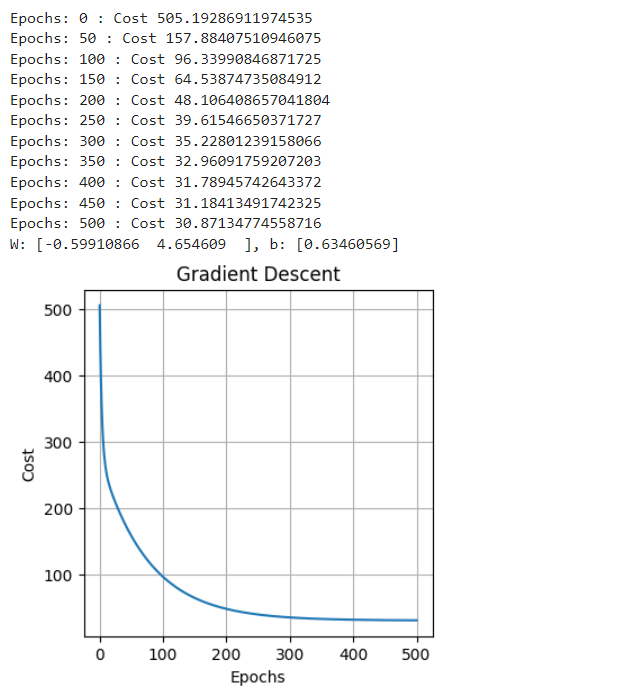

# [10 Points] Task 02 - Mini-Batch Gradient Descent

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)})$$

Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster. However, since SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily.

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples:

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)})$$




This way, it a) reduces the variance of the parameter updates, which can lead to more stable convergence; and b) can make use of highly optimized matrix optimizations common to state-of-the-art deep learning libraries that make computing the gradient w.r.t. a mini-batch very efficient. Common mini-batch sizes range between 50 and 256, but can vary for different applications.


**In this task, you are required to implement the Mini-Batch Gradient Descent optimizer by completing the functions `mini_batch_gradient_descent` and  `create_mini_batches`.**

## Hyperparameters & Parameter Initialisation

In [ ]:
# DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
batch_size = 1
lr=0.0003
epochs=500

## Mini Batches

In [ ]:
#TODO: Complete the function create_mini_batches which splits the total data into multiple batches of the size specified.
def create_mini_batches(X,y,batch_size=32):
    """
    Splits the total dataset into multiple batches of size equal to the batch_size
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        batch_size (integer): Size of each mini batch
    Return:
        mini_batches (list): List of multiple mini batches
    """
    mini_batches = []  # Initialize an empty list to store the mini-batches
    indices = np.random.permutation(np.arange(X.shape[0]))  # Randomly shuffle the indices of the data points
    # Shuffle the feature matrix according to the shuffled indices
    X_shuffled =
    # Shuffle the label vector according to the shuffled indices
    Y_shuffled =

    n_minibatches = int(np.ceil(np.divide(X.shape[0], batch_size)))  # Calculate the number of mini-batches needed

    for i in range(n_minibatches):
        # Extract a mini-batch of data and labels based on the current batch index
        # This loop iterates through the entire dataset, creating mini-batches
        X_batch =
        Y_batch =
        # Append the current mini-batch to the list of mini-batches
        mini_batches.append((X_batch, Y_batch))

    return mini_batches  # Return the list of mini-batches

## Model Training

In [ ]:
#TODO: Complete the function mini_batch_gradient_descent which implements the mini_batch gradient descent optimizer
def mini_batch_gradient_descent(X,Y,w,b, lr = 0.0003, batch_size=32, epochs = 500):
    """
    Implements the Mini-Batch Gradient Descent Optimizer
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        w (Numpy-1D Array): Weight Vector
        b (Numpy-1D Scalar): Bias Scalar
        lr (float): Learning rate
        batch_size (integer): Size of each batch
        epochs (integer): Number of epochs
    Return:
        loss (list): Loss at each iteration
    """
    loss = []
    for epoch in range(epochs+1):
        mini_batches = create_mini_batches(X,Y,batch_size)
        n_minibatches = len(mini_batches)
        l = []
        for x_min,y_min  in mini_batches:
          w_grad,b_grad = compute_gradients(x_min,y_min, w,b)
          # Update the value of w
          w =
          # Update the value of b
          b =
          l.append(loss_function(x_min,y_min,w,b))
        loss.append(np.mean(l))
        if epoch % 50 == 0:
          print(f'Epochs: {epoch} : Cost {loss[-1]}')
    print(f'W: {w}, b: {b}')

    # Plot a graph of Cost (MSE) vs Epochs
    plt.figure(figsize=(8,6))
    plt.plot(loss)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Mini-Batch Gradient Descent')
    plt.show()

    return loss

In [ ]:
# DO NOT EDIT
mini_loss = mini_batch_gradient_descent(X_shuffled,y_shuffled,weight,bias,lr,batch_size,epochs)

**There are no testcases for this question.**

**The expected output is as follows. However, please note that the output might slightly differ due to randomness.**

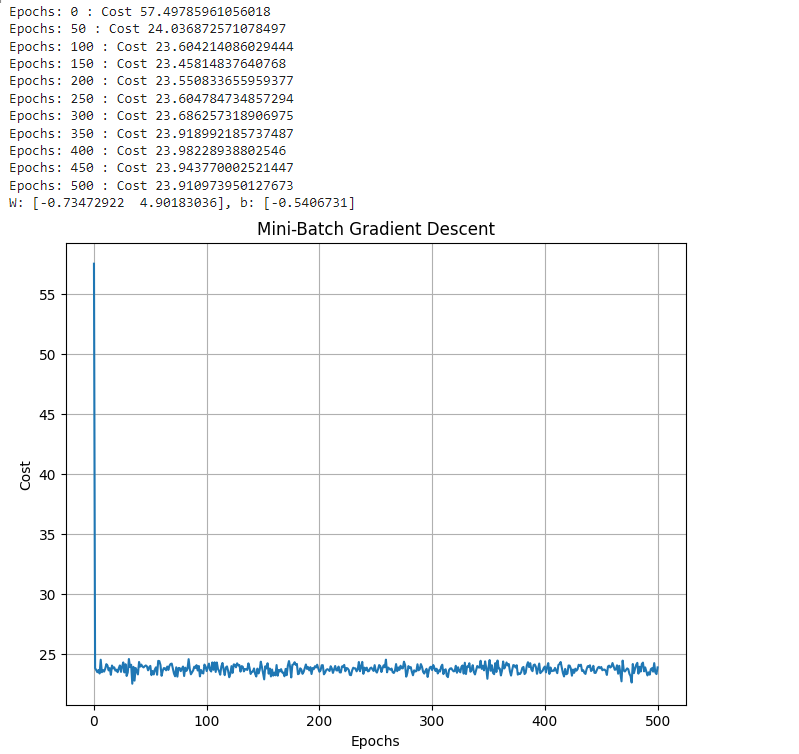

# [10 Points] Task 03  - Gradient Descent with Momentum

SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another , which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction $\gamma$ of the update vector of the past time step to the current update vector:

$$\begin{align}
\begin{split}
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta) \\
\theta &= \theta - v_t
\end{split}
\end{align}
$$

Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity if there is air resistance, i.e. $\gamma < 1$ ). The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

**In this task, you are required to complete the function `gradient_descent_momentum` which implements the Gradient Descent Optimizer with momentum.**

## Hyperparameters & Parameter Initialisation

In [ ]:
# DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
gamma = 0.6
lr=0.0003
epochs=500

## Model Training

In [ ]:
#TODO: Complete the function gradient_descent_momentum which implements the gradient descent optimizer with momentum
def gradient_descent_momentum(X,y, w,b, lr = 0.0003, gamma = 0.6, epochs = 500):
    """
    Implements the Gradient Descent Optimizer
    Args:
        X (Numpy-2D Array): Feature Matrix.
        y (Numpy-1D Array): Label Vector.
        w (Numpy-1D Array): Weight Vector
        b (Numpy-1D Scalar): Bias Scalar
        lr (float): Learning rate
        gamma (floar): Momentum Constant
        epochs (integer): Number of epochs
    Return:
        loss (list): Loss at each iteration
    """
    loss = []
    # Initialize vt with zeros:
    vt_w = np.zeros(w.shape[0])
    vt_b = np.zeros(b.shape[0])
    for epoch in range(epochs + 1):
        # Ccompute gradients with respect to w,b
        w_grad,b_grad = compute_gradients(X,y, w,b)
        # Compute update vt
        vt_w =
        vt_b =
        # Update model parameter using vt
        w =
        b =
        # Store loss of every iteration
        loss.append(loss_function(X,y,w,b))
        if epoch % 50 == 0:
          print(f'Epochs: {epoch} : Cost {loss[-1]}')
    print(f'W: {w}, b: {b}')
    plt.figure(figsize=(8,6))
    plt.plot(loss)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Gradient Descent with Momentum')
    plt.show()
    return loss

In [ ]:
# DO NOT EDIT
# TEST CODE FOR CHECKING FUNCTION
momentum_loss = gradient_descent_momentum(X_shuffled,y_shuffled,weight,bias,lr,gamma,epochs)
assert np.allclose(np.array([505.19286911974535,76.9567824705472,38.99064968334486,32.07647852877908,30.817295406672496,30.58796316564443,30.546180907717634,30.53855408921377,30.537147460275676,30.53687362882533,30.53680611099]),np.array(momentum_loss[::50]))


**The expected output is as follows:**

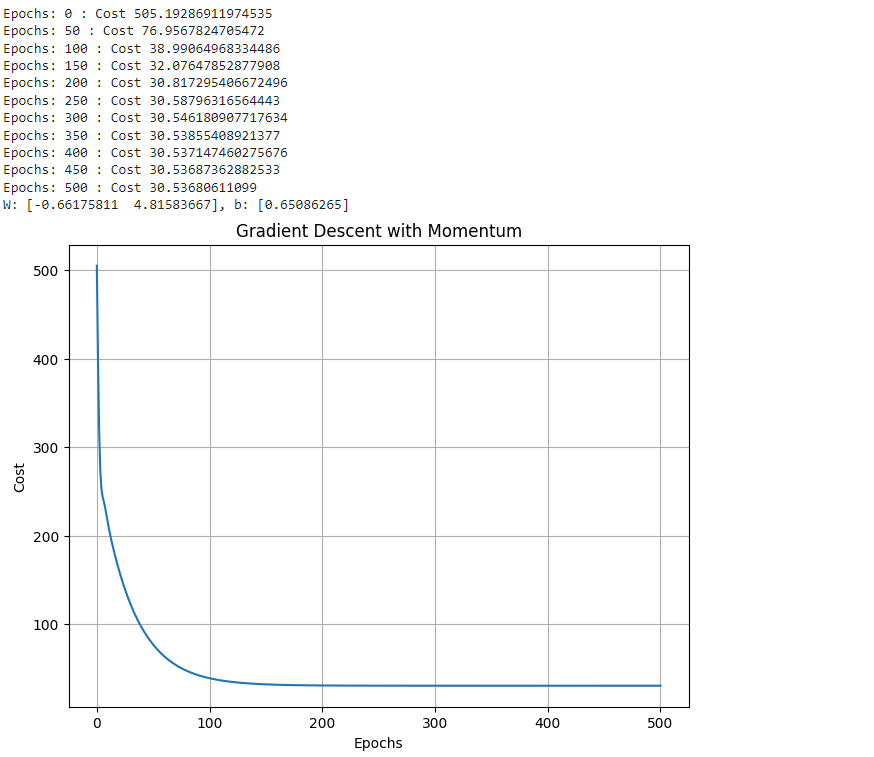

# [20 Points] Task 04 - Adaptive Gradient (AdaGrad)

Adagrad is an algorithm for gradient-based optimization that does the following: It adapts the learning rate to the parameters, performing smaller updates (i.e. low learning rates) for parameters associated with frequently occuring features, and larger updates (i.e. high learning rates) for parameters
associated with infrequent features.

In its update rule, Adagrad modifies the general learning rate $\eta$
at each time step $t$ for every parameter $\theta_i$ based on the past gradients that have been computed for $\theta_i$

$$\theta_{t}^{i} = \theta_{t-1}^{i} - \frac{\eta}{\sqrt{G_t+\epsilon}}\cdot g_t $$

where $G_t$ is sum of squared gradients and $\epsilon$ is the smoothing terms that avoids division by zero. Adagrad's main weakness is its accumulation of the squared gradients in the denominator: Since every added term is positive, the accumulated sum keeps growing during training. This in turn causes the learning rate to shrink and eventually become infinitesimally small, at which point the algorithm is no longer able to acquire additional knowledge.

**In this task, you are required to complete the function `AdaGrad` which implements the Adaptive Gradient Optimizer.**

## Hyperparameters & Parameter Initialisation

In [ ]:
# DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
lr = 0.003
epsilon = 1e-6
epochs = 500

## Model Training

In [ ]:
#TODO: Complete the function AdaGrad which implements the adaptive gradient optimizer
def AdaGrad(X,y, w,b, lr = 0.003, epsilon = 1e-8, num_iterations = 500):
    loss = []
    # Initialize gradients_sum for storing sum of gradients
    gradw_sum = np.zeros(w.shape[0])
    gradb_sum = np.zeros(b.shape[0])
    for epoch in range(epochs):
        # Compute gradients with respect to theta
        grad_w,grad_b = compute_gradients(X,y, w,b)
        # Compute square of sum of gradients
        gradw_sum +=
        gradb_sum +=
        # Compute gradient update
        gradw_update =
        gradb_update =
        # Update model parameter
        w =
        b =
        loss.append(loss_function(X,y,w,b))
        if epoch % 50 == 0:
          print(f'Epochs: {epoch} : Cost {loss[-1]}')
    print(f'W: {w}, b: {b}')
    # Plot a graph of Cost (MSE) vs Epochs
    plt.figure(figsize=(8,6))
    plt.plot(loss)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('AdaGrad')
    plt.show()
    return loss

## Loss vs Epochs

In [ ]:
# DO NOT EDIT
# TEST CODE FOR CHECKING FUNCTION
adagrad_loss = AdaGrad(X_shuffled,y_shuffled,weight,bias,lr,epsilon,epochs)
assert np.allclose(np.array(adagrad_loss[::50]),np.array([589.7185914410361,561.6927481798084,548.5703725856347,538.6925197767029,530.5086175040136,523.4108093952304,517.0856642538824,511.34641311562626,506.0711242584345,501.1749888886819]))


**The expected output is as follows:**

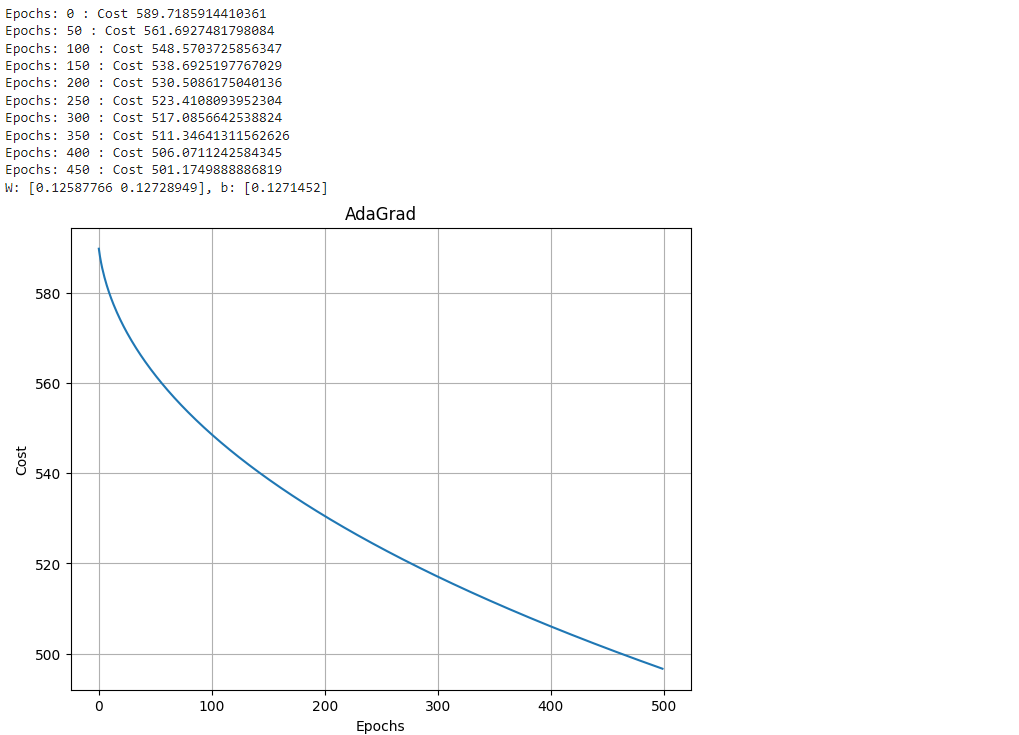

# [20 Points] Task 05 - AdaDelta

We can see that in the case of Adagrad we had a vanishing learning rate problem. To deal with this we generally use Adadelta.

In Adadelta, instead of taking the sum of all the squared past gradients, we take the exponentially decaying running average or weighted average of gradients.

Running average of gradients, $ E[g^2]_{t-1} $, and current gradients, $ g_{t}^{2} $
$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g^2_t $$
Running average of squared parameter updates, $ E[\Delta \theta^2]_{t-1} $, and current squared parameter update, $ \Delta\theta^2_t $
$$ E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1 - \gamma) \Delta\theta^2_t$$

$$ RMS[\Delta \theta]_{t} = \sqrt{E[\Delta \theta^2]_t + \epsilon}$$
$$ RMS[g]_{t} = \sqrt{E[g^2]_t + \epsilon}$$


Now, our update equation becomes the following:
$$\begin{align}
\begin{split}
\Delta \theta_t &= - \dfrac{RMS[\Delta \theta]_{t-1}}{RMS[g]_{t-1}} g_{t} \\
\theta_{t+1} &= \theta_t + \Delta \theta_t
\end{split}
\end{align}$$


**In this task, you are required to complete the function `AdaDelta` which implements the AdaDelta Optimizer.**

## Hyperparameters & Parameter Initialisation

In [ ]:
# DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
gamma = 0.6
epsilon = 1e-5
epochs = 500

## Model Training

In [ ]:
#TODO: Complete the function AdaDelta which implements the AdaDelta optimizer
def AdaDelta(X,y,w,b, gamma = 0.6, epsilon = 1e-5,epochs=500):
    loss = []
    # Initialize running average of gradients
    E_grad2_w = np.zeros(w.shape[0])
    E_grad2_b = np.zeros(b.shape[0])
    # Initialize running average of parameter update
    E_delta_theta2_w = np.zeros(w.shape[0])
    E_delta_theta2_b = np.zeros(b.shape[0])
    for epoch in range(epochs):
        # Compute gradients of loss with respect to theta
        w_grad,b_grad = compute_gradients(X,y,w,b)
        # Compute running average of gradients
        E_grad2_w =
        E_grad2_b =
        # Compute delta_theta
        delta_theta_w =
        delta_theta_b =
        # Compute running average of parameter updates
        E_delta_theta2_w =
        E_delta_theta2_b =
        # Update the model parameters
        w =
        b =
        #store  the loss
        loss.append(loss_function(X,y,w,b))
        if epoch % 50 == 0:
          print(f'Epochs: {epoch} : Cost {loss[-1]}')
    print(f'W: {w}, b: {b}')
    # Plot a graph of Cost (MSE) vs Epochs
    plt.figure(figsize=(8,6))
    plt.plot(adadelta_loss)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('AdaDelta')
    plt.show()
    return loss


In [ ]:
# DO NOT EDIT
# TEST CODE FOR CHECKING FUNCTION
adadelta_loss = AdaDelta(X_shuffled,y_shuffled,weight,bias,gamma,epsilon,epochs)
assert np.allclose(np.array([588.1041352508646,300.1710588981491,189.42034462788376,117.95141527285439,63.94192190482174,36.71622114024312,30.748135333686694,30.74459798824315,30.79380383910042,30.843118502392667]),np.array(adadelta_loss[::50]))

**The expected output is as follows:**

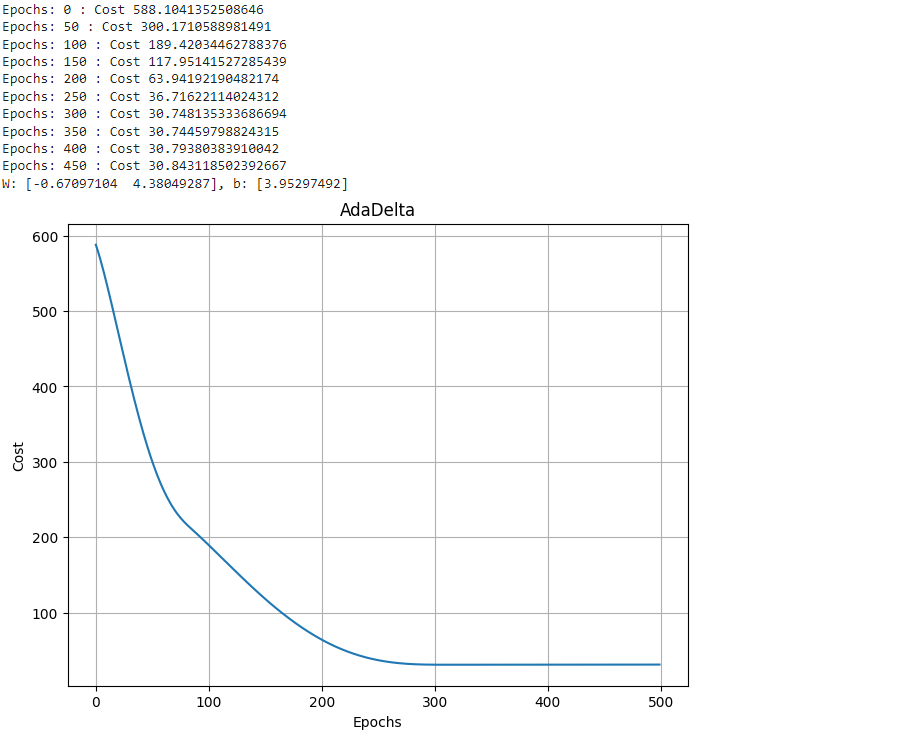

# [20 Points] Task 06 - Adaptive Moment Estimation

Adaptive Moment Estimation (Adam)  is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients $v_t$ like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients $m_t$, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface . We compute the decaying averages of past and past squared gradients $m_t$ and $v_t$ respectively as follows:

$$\begin{align}
\begin{split}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
\end{split}
\end{align}$$

$m_t$ and $v_t$  are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively, hence the name of the method. As $m_t$ and $v_t$ are initialized as vectors of 0's, the authors of Adam observe that they are biased towards zero, especially during the initial time steps, and especially when the decay rates are small (i.e.
$\beta_1$ and $\beta_2$ are close to 1).

They counteract these biases by computing bias-corrected first and second moment estimates:
$$
\begin{align}
\begin{split}
\hat{m}_t &= \dfrac{m_t}{1 - \beta^t_1} \\
\hat{v}_t &= \dfrac{v_t}{1 - \beta^t_2} \end{split}
\end{align}
$$


They then use these to update the parameters just as we have seen in Adadelta and RMSprop, which yields the Adam update rule:

$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t $$


**In this task, you are required to complete the function `Adam` which implements the Adam Optimizer.**

## Hyperparameters & Parameter Initialisation

In [ ]:
# DO NOT EDIT
weight = np.zeros(X_shuffled.shape[1])
bias = np.zeros(1)
epsilon = 1e-6
epochs = 500
lr=0.003
beta1=0.9
beta2=0.9

## Model Training

In [ ]:
#TODO: Complete the function Adam which implements the mini_batch gradient descent optimizer
def Adam(X,y,w,b,lr = 0.003, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, epochs = 500):
    loss = []
    # Initialize first moment mt
    mt_w = np.zeros(w.shape[0])
    mt_b = np.zeros(b.shape[0])
    # Initialize second moment vt
    vt_w = np.zeros(w.shape[0])
    vt_b = np.zeros(b.shape[0])
    for epoch in range(epochs):
        # Compute gradients with respect to theta
        w_grad,b_grad = compute_gradients(X,y,w,b)
        # Update first moment mt
        mt_w =
        mt_b =
        # Update second moment vt as given
        vt_w =
        vt_b =
        # Compute bias-corected estimate of mt (21)
        mt_hat_w =
        mt_hat_b =
        # Compute bias-corrected estimate of vt (22)
        vt_hat_w =
        vt_hat_b =
        # Update the model parameter as given in (23)
        w =
        b =
        loss.append(loss_function(X,y,w,b))
        if epoch % 50 == 0:
          print(f'Epochs: {epoch} : Cost {loss[-1]}')
    print(f'W: {w}, b: {b}')

    # Plot a graph of Cost (MSE) vs Epochs
    plt.figure(figsize=(8,6))
    plt.plot(loss)
    plt.grid()
    plt.xlabel('Training Iterations')
    plt.ylabel('Cost')
    plt.title('Adam')
    plt.show()

    return loss

In [ ]:
# DO NOT EDIT
# TEST CODE FOR CHECKING FUNCTION
adam_loss = Adam(X_shuffled,y_shuffled,weight,bias,lr,beta1,beta2,epsilon,epochs)
assert np.allclose(np.array([589.7185914499677,478.4904052390764,387.21874670650527,315.87054585714833,264.4373427061174,232.8619700566571,215.60893083042387,199.65099110125982,184.4449560254619,169.9560717101608]),np.array(adam_loss[::50]))


**The expected output is as follows:**

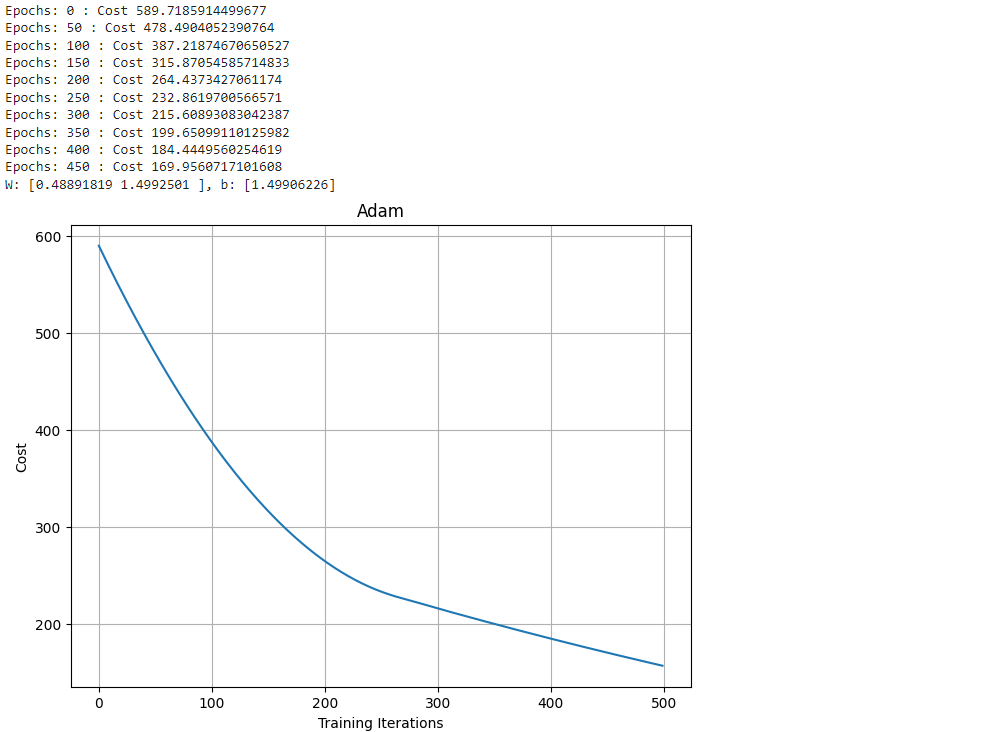

# [10 Points ] Task 07 - Overall Comparision

**In this task, you have been given the graph of MSE Loss vs Epochs for each optimizer on the same graph and are required to compare based on their shape**

In [ ]:
# DO NOT EDIT
plt.figure(figsize=(8,8))
plt.plot(gr_loss,label='Gradient',color='Red',alpha=0.8)
plt.plot(mini_loss,label='Mini',color='Orange',alpha=0.8)
plt.plot(momentum_loss,label='Momentum',color='Blue',alpha=0.8)
plt.plot(adagrad_loss,label='AdaGrad',color='Green',alpha=0.8)
plt.plot(adadelta_loss,label='AdaDelta',color='Yellow',alpha=0.8)
plt.plot(adam_loss,label='Adam',color='Purple',alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Comparision of different optimizers')
plt.show()

**The expected output is as follows:**

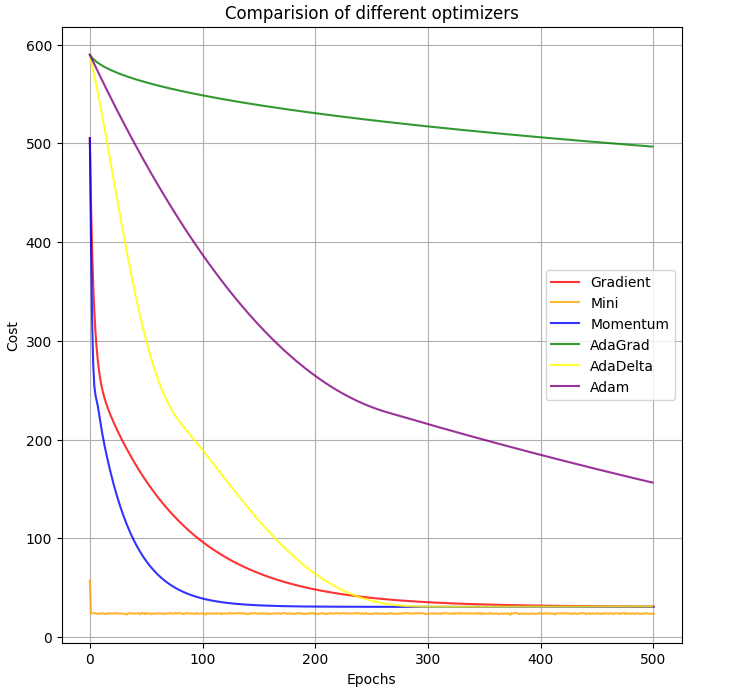

**Please write your answer here. If you skip this task, you will be given a 0 in the lab, regardless of the other tasks.**